# Logistic Regression

In this notebook, we will be implementing logisitic regression for binary and multi-class classificiation using the Iris dataset.

## 1. Logistic Regression for Binary Classification

#### Importing necessary packages/libraries

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#### Loading the datasets

In [32]:
X_train = pd.read_csv('dataset/X_train.csv', header=None)
X_test = pd.read_csv('dataset/X_test.csv', header=None)
y_train = pd.read_csv('dataset/y_train.csv', header=None)
y_test = pd.read_csv('dataset/y_test.csv', header=None)

In [33]:
X_train.head()
X_train.shape
y_train

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
115,1.0
116,2.0
117,0.0
118,1.0


#### Define class names in this classification

In [34]:
# Assigning label names to all the labels
classes = ['Iris setosa', 'Not setosa']

In [35]:
y_train = np.where(y_train == 2, 1, y_train)
y_test = np.where(y_test == 2, 1, y_test)

In [36]:
print(np.unique(y_train))
print(np.unique(y_test))

[0. 1.]
[0. 1.]


#### Let's define and trian our One VS Rest Logistic Regression Model

In [37]:
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)

/Users/prashanthjaganathan/miniconda3/envs/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

#### Learned co-efficients of the trained model

In [38]:
model.coef_

array([[-1.25281816, -1.97743888]])

#### Using the model to make some predictions

In [39]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [40]:
def calc_accuracy(pred, actual):
    correct = 0
    correct = sum(1 for i in range(len(pred)) if pred[i] == actual[i])

    return (correct / len(pred)) * 100

#### Evaluating the model

In [41]:
print(f'Accuracy on train set: {calc_accuracy(y_train_pred, y_train)}')
print(f'Accuracy on test set: {calc_accuracy(y_test_pred, y_test)}')

Accuracy on train set: 100.0
Accuracy on test set: 100.0


#### Let's visualize the decision boundary and the dataset

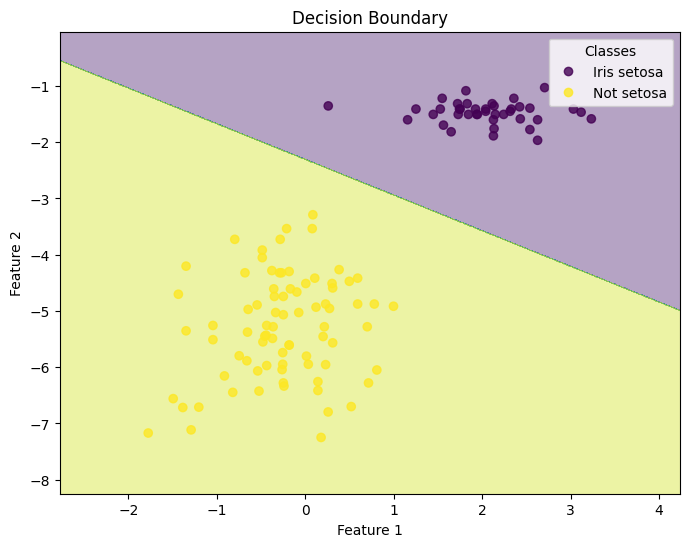

In [42]:
def plot_decision_boundary(X, y, model, classes):
    h = 0.01
    x_min, x_max = X[:][0].min() - 1, X[:][0].max() + 1
    y_min, y_max = X[:][1].min() - 1, X[:][1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X[:][0], X[:][1], c=y, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend(handles=scatter.legend_elements()[0], 
              labels=classes,
              title="Classes")
    plt.show()

plot_decision_boundary(X_train, y_train, model, classes)

## 2. Logistic Regression with Softmax for Multi-class Classification

#### Loading the datasets

In [43]:
X_train = pd.read_csv('dataset/X_train.csv', header=None)
X_test = pd.read_csv('dataset/X_test.csv', header=None)
y_train = pd.read_csv('dataset/y_train.csv', header=None)
y_test = pd.read_csv('dataset/y_test.csv', header=None)

#### Defining the classes used by the classifier

In [44]:
# Assigning label names to all the labels
classes = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

#### Let's define our multi class classifier

In [45]:
model = LogisticRegression(penalty='l2', multi_class='multinomial')
model.fit(X_train, y_train)

/Users/prashanthjaganathan/miniconda3/envs/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prashanthjaganathan/miniconda3/envs/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

#### Learned co-efficients of the model

In [46]:
model.coef_

array([[ 1.12393584,  2.22919459],
       [-0.55527035,  0.60345908],
       [-0.56866549, -2.83265367]])

#### Using the model to make predictions

In [47]:
y_train_pred = model.predict(X_train.to_numpy())
y_test_pred = model.predict(X_test.to_numpy())

#### Evaluating the model

In [48]:
print(f'Accuracy on train set: {calc_accuracy(y_train_pred, y_train.to_numpy())}')
print(f'Accuracy on test set: {calc_accuracy(y_test_pred, y_test.to_numpy())}')

Accuracy on train set: 95.83333333333334
Accuracy on test set: 100.0


#### Let's visualize the decision boundaries and the dataset

/var/folders/wx/4yxslk096b3_6y5t4dg2jr0h0000gn/T/ipykernel_3593/45352832.py:31: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0.5], colors=[boundary_colors[i]], linewidths=2, label=f'Boundary for {class_label}')
/var/folders/wx/4yxslk096b3_6y5t4dg2jr0h0000gn/T/ipykernel_3593/45352832.py:31: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0.5], colors=[boundary_colors[i]], linewidths=2, label=f'Boundary for {class_label}')
/var/folders/wx/4yxslk096b3_6y5t4dg2jr0h0000gn/T/ipykernel_3593/45352832.py:31: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0.5], colors=[boundary_colors[i]], linewidths=2, label=f'Boundary for {class_label}')
/var/folders/wx/4yxslk096b3_6y5t4dg2jr0h0000gn/T/ipykernel_3593/45352832.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are

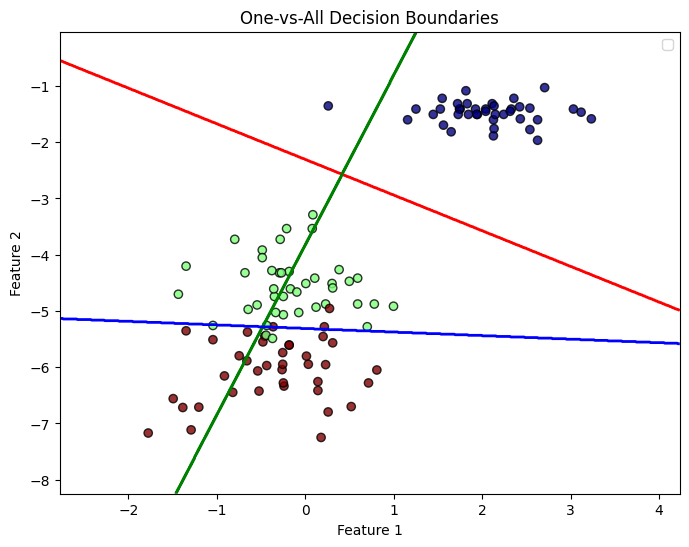

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

def plot_multiple_onevsall_decision_boundary(X, y, model, classes):
    h = 0.01 
    X = np.array(X) 
    y = np.array(y).flatten()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.figure(figsize=(8, 6))

    boundary_colors = ['r', 'g', 'b']

    for i, class_label in enumerate(classes):
        binary_y = (y == class_label).astype(int)  # Convert to binary (1 = current class, 0 = others)

        # Train a separate Logistic Regression model for each class
        model = LogisticRegression()
        model.fit(X, binary_y)

        # Predict decision boundary for current class
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot decision boundary for current class
        plt.contour(xx, yy, Z, levels=[0.5], colors=[boundary_colors[i]], linewidths=2, label=f'Boundary for {class_label}')

    # Scatter plot for data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet, edgecolors='k', alpha=0.8)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('One-vs-All Decision Boundaries')
    plt.legend()

    plt.show()

plot_multiple_onevsall_decision_boundary(X_train, y_train, model=None, classes=np.unique(y_train))

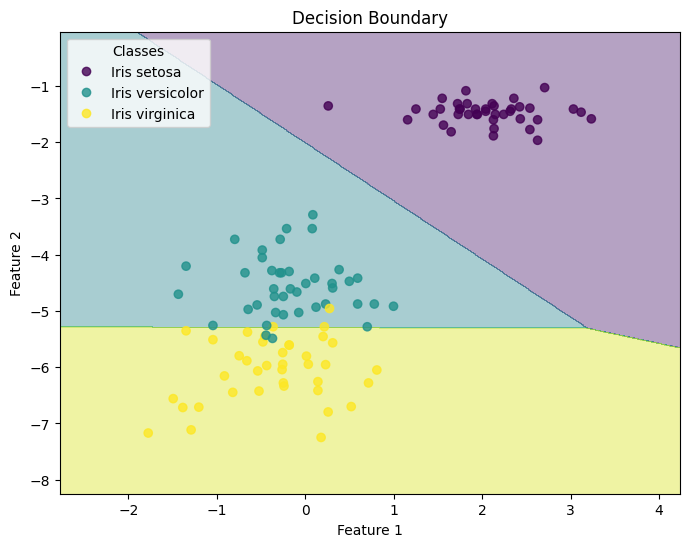

In [50]:
plot_decision_boundary(X_train, y_train, model, classes)